0. Import libraries

In [1]:
import os
import cv2
import pandas as pd

1. Load data 

In [2]:
breed_data = pd.read_csv('./dog_data/labels.csv')
image_folder = "./dog_data/train/"

In [3]:
breed_data.tail()

id                     breed
10217  ffd25009d635cfd16e793503ac5edef0                    borzoi
10218  ffd3f636f7f379c51ba3648a9ff8254f            dandie_dinmont
10219  ffe2ca6c940cddfee68fa3cc6c63213f                  airedale
10220  ffe5f6d8e2bff356e9482a80a6e29aac        miniature_pinscher
10221  fff43b07992508bc822f33d8ffd902ae  chesapeake_bay_retriever

In [4]:
# Number of different breed type
breed_data.breed.value_counts()

breed
scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
brabancon_griffon        67
komondor                 67
eskimo_dog               66
briard                   66
Name: count, Length: 120, dtype: int64

<Axes: xlabel='breed'>

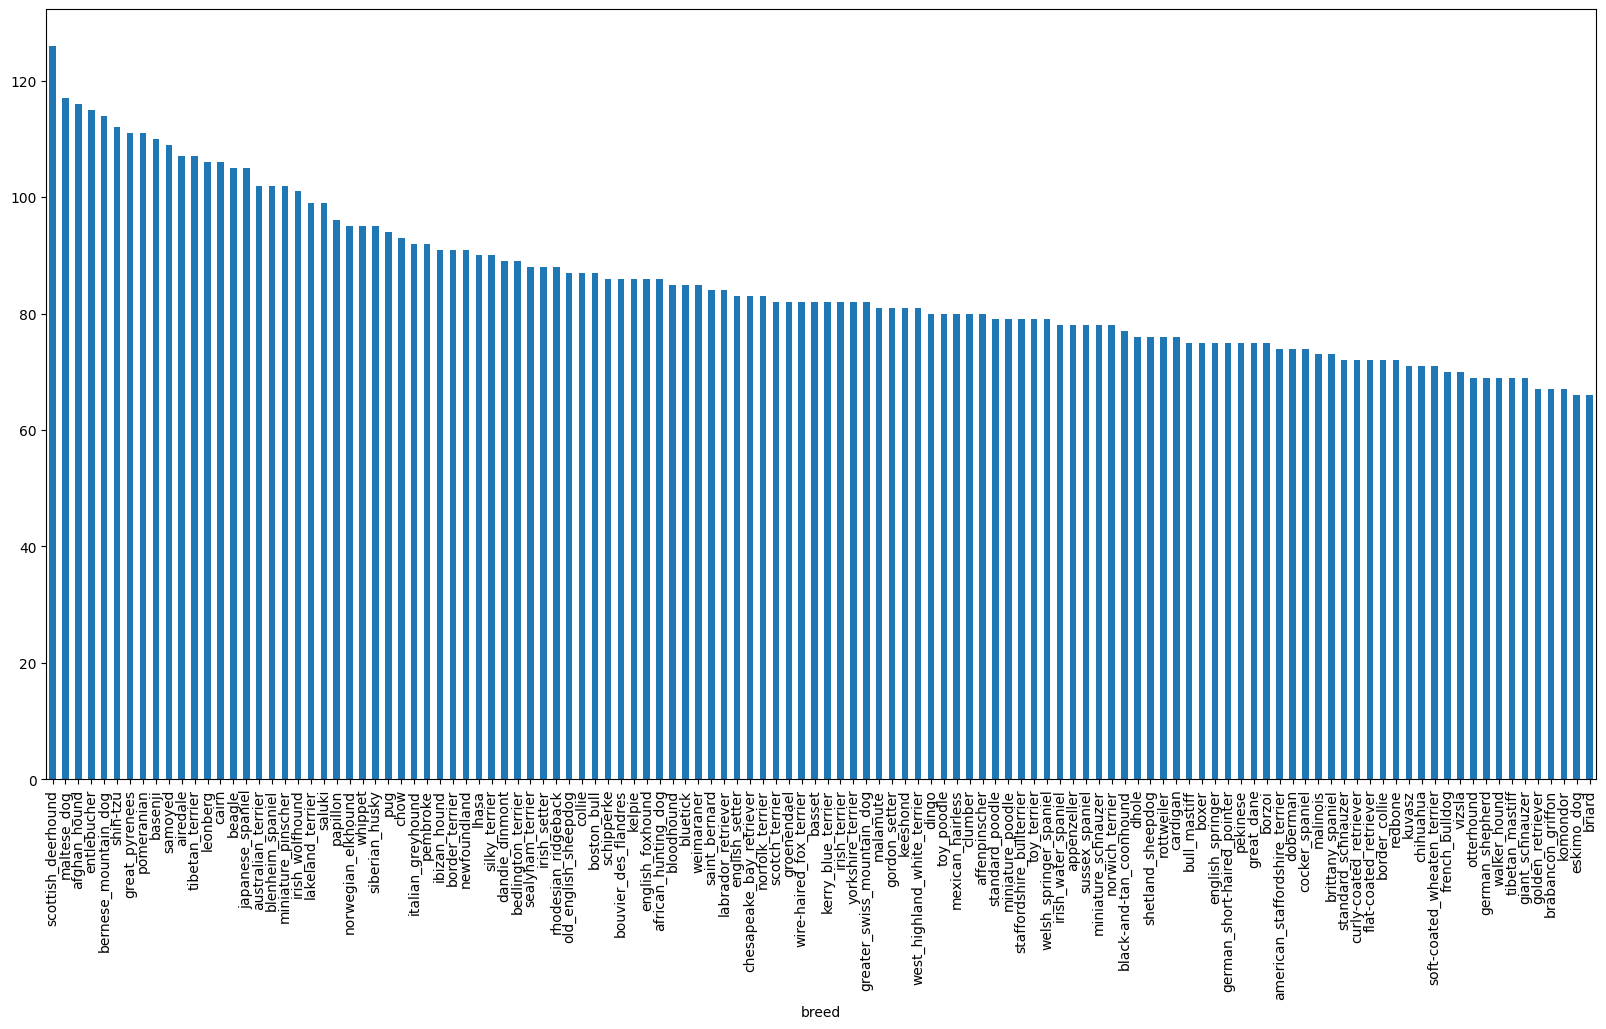

In [5]:
breed_data["breed"].value_counts().plot.bar(figsize=(20, 10))

2. Select representative varieties

In [51]:
# representative 20 breeds select
# cluster code reference
representative_breeds = [
    'airedale', 'dhole', 'bull_mastiff', 'redbone', 'silky_terrier',
    'flat-coated_retriever', 'chow', 'shetland_sheepdog', 'toy_terrier',
    'entlebucher', 'borzoi', 'malamute', 'irish_water_spaniel',
    'sealyham_terrier', 'english_foxhound', 'brittany_spaniel',
    'komondor', 'sussex_spaniel', 'kerry_blue_terrier', 'japanese_spaniel'
]

representative_breeds

['airedale',
 'dhole',
 'bull_mastiff',
 'redbone',
 'silky_terrier',
 'flat-coated_retriever',
 'chow',
 'shetland_sheepdog',
 'toy_terrier',
 'entlebucher',
 'borzoi',
 'malamute',
 'irish_water_spaniel',
 'sealyham_terrier',
 'english_foxhound',
 'brittany_spaniel',
 'komondor',
 'sussex_spaniel',
 'kerry_blue_terrier',
 'japanese_spaniel']

In [7]:
rep_breeds=breed_data[breed_data.breed.isin(representative_breeds)]
rep_breeds.shape # (column num, raw num)

(1668, 2)

In [8]:
# Number of different breed type
rep_breeds.breed.value_counts()

breed
entlebucher              115
airedale                 107
japanese_spaniel         105
chow                      93
silky_terrier             90
sealyham_terrier          88
english_foxhound          86
kerry_blue_terrier        82
malamute                  81
toy_terrier               79
sussex_spaniel            78
irish_water_spaniel       78
dhole                     76
shetland_sheepdog         76
borzoi                    75
bull_mastiff              75
brittany_spaniel          73
flat-coated_retriever     72
redbone                   72
komondor                  67
Name: count, dtype: int64

In [9]:
print("Total number of unique Dog Breeds :",len(rep_breeds.breed.unique()))

Total number of unique Dog Breeds : 20


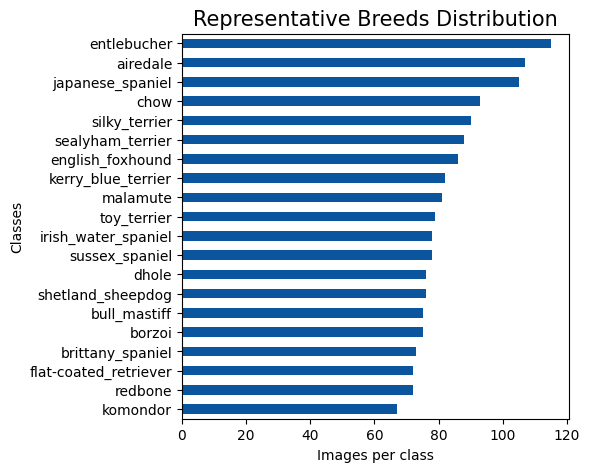

In [49]:
import seaborn as sns
from matplotlib import pyplot as plt

# Set a consistent blue color
class_color = sns.color_palette("Blues")[5]  # Adjust the index as needed

# Get the counts of images per class
class_counts = pd.value_counts(rep_breeds['breed'], ascending=True)

# Plot the bar chart with a consistent blue color
ax = class_counts.plot(kind='barh', fontsize="10", title="Representative Breeds Distribution", figsize=(5, 5), color=class_color)
ax.set(xlabel="Images per class", ylabel="Classes")
ax.xaxis.label.set_size(10)
ax.yaxis.label.set_size(10)
ax.title.set_size(15)
plt.show()


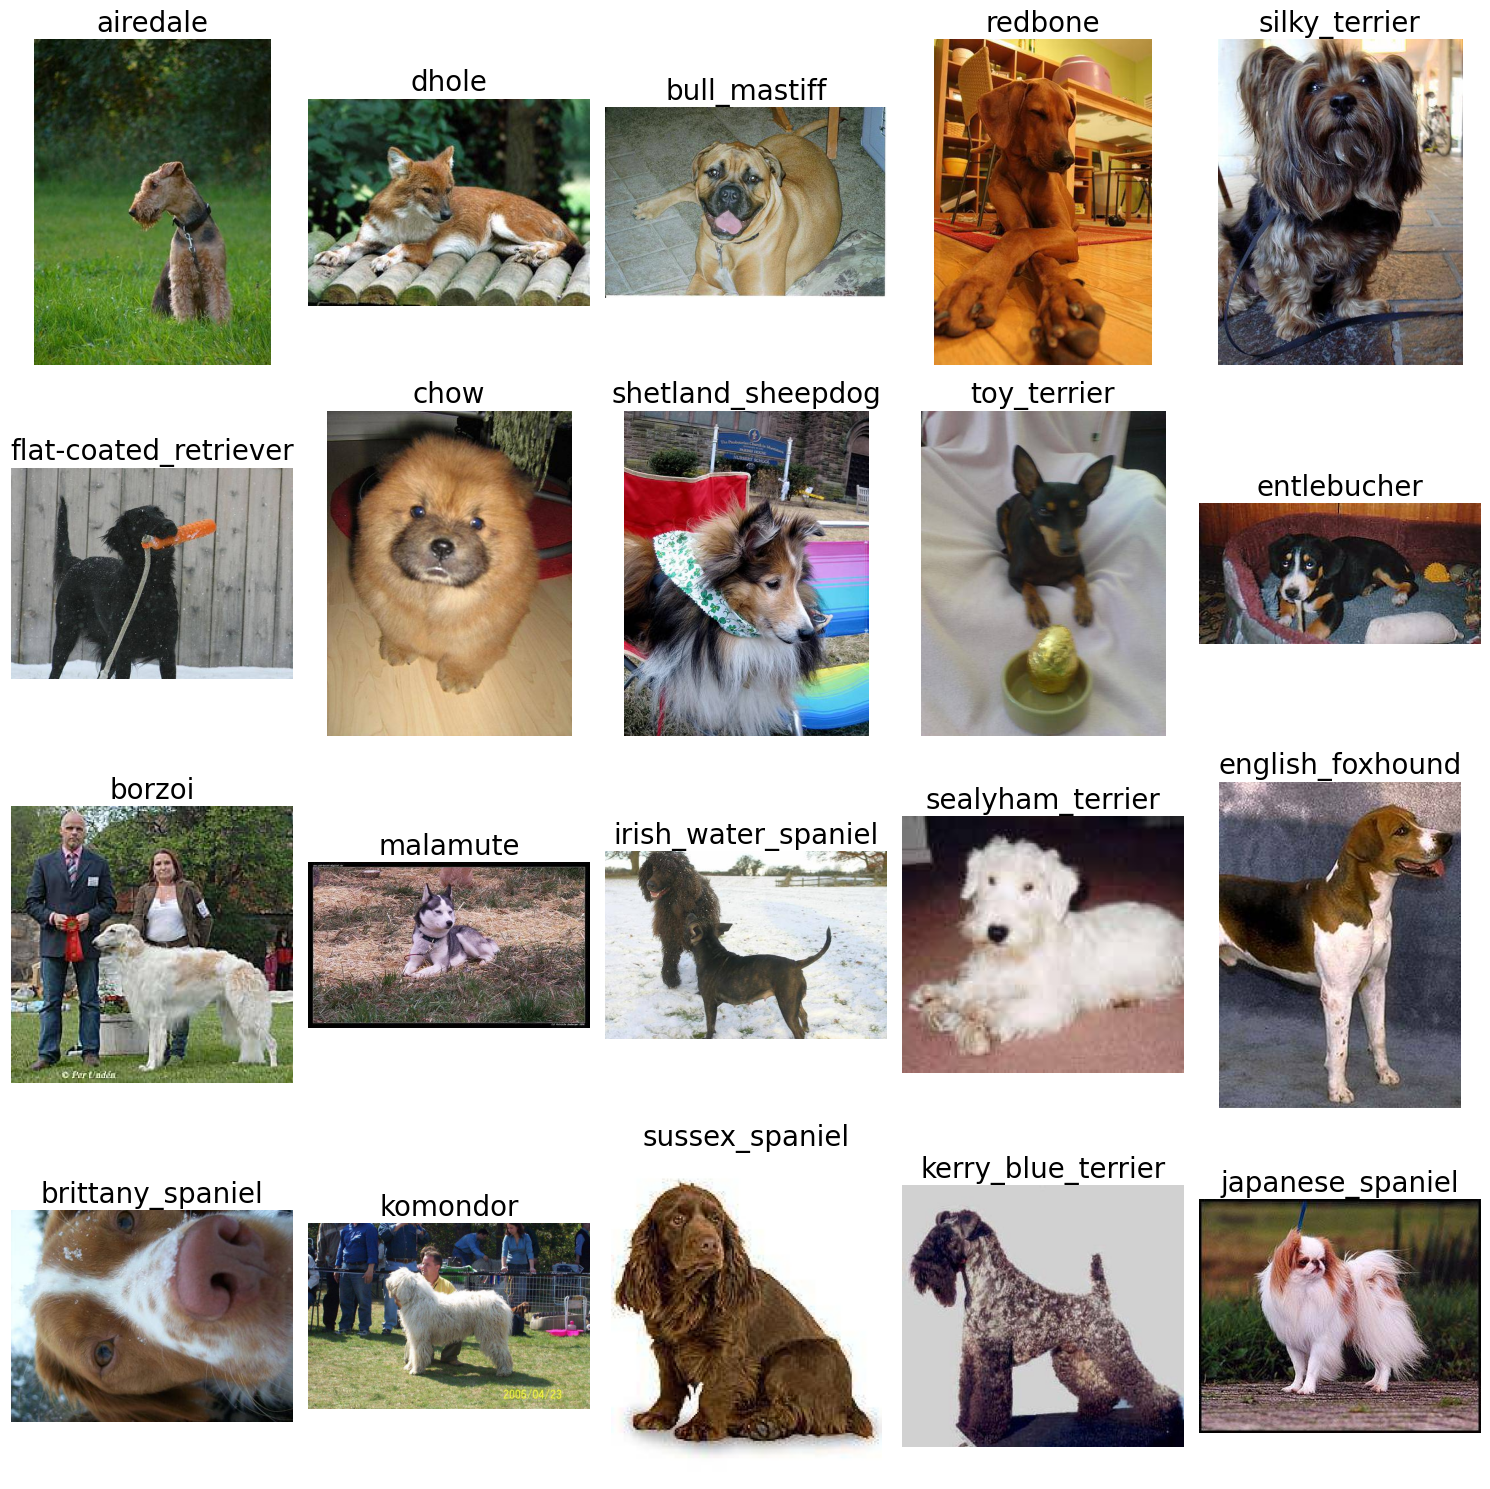

In [11]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# Set font properties for label
font_props = FontProperties(size=20)

nrow, ncol = 4, 5
fig, ax = plt.subplots(nrow, ncol, figsize=(15, 15))

# Extracting image paths and breeds for the representative breeds
representative_breeds_list = representative_breeds

# Displaying images for each representative breed
for i, breed in enumerate(representative_breeds_list):
    # Getting one image for each breed
    img_id = rep_breeds[rep_breeds['breed'] == breed]['id'].iloc[0]
    image_path = os.path.join(image_folder, f"{img_id}.jpg")

    # Reading and displaying the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    row = i // ncol
    col = i % ncol
    ax[row, col].imshow(image)
    ax[row, col].set_title(breed, fontproperties=font_props)
    ax[row, col].axis("off")

plt.tight_layout()
plt.show()


3. Data preprocessing

In [12]:
from sklearn.preprocessing import LabelEncoder

num_breed = 20
image_size = 224
batch_size = 32
encoder = LabelEncoder()

In [13]:
# rep_breeds check before add image_file column
rep_breeds

id                breed
7      002a283a315af96eaea0e28e7163b21b               borzoi
10     004396df1acd0f1247b740ca2b14616e    shetland_sheepdog
17     007b8a07882822475a4ce6581e70b1f8              redbone
27     00b7d114bc5166a629a3cc03d9329120  irish_water_spaniel
41     011bd7fd7c036dbb243d0e37329c77b7  irish_water_spaniel
...                                 ...                  ...
10208  ffa6a8d29ce57eb760d0f182abada4bf     english_foxhound
10213  ffca1c97cea5fada05b8646998a5b788     english_foxhound
10215  ffcde16e7da0872c357fbc7e2168c05f             airedale
10217  ffd25009d635cfd16e793503ac5edef0               borzoi
10219  ffe2ca6c940cddfee68fa3cc6c63213f             airedale

[1668 rows x 2 columns]

In [15]:
# Create image_file row 
rep_breeds.loc[:, 'image_file'] = rep_breeds['id'].apply(lambda x: x + ".jpg")
rep_breeds.head()

id                breed  \
7   002a283a315af96eaea0e28e7163b21b               borzoi   
10  004396df1acd0f1247b740ca2b14616e    shetland_sheepdog   
17  007b8a07882822475a4ce6581e70b1f8              redbone   
27  00b7d114bc5166a629a3cc03d9329120  irish_water_spaniel   
41  011bd7fd7c036dbb243d0e37329c77b7  irish_water_spaniel   

                              image_file  
7   002a283a315af96eaea0e28e7163b21b.jpg  
10  004396df1acd0f1247b740ca2b14616e.jpg  
17  007b8a07882822475a4ce6581e70b1f8.jpg  
27  00b7d114bc5166a629a3cc03d9329120.jpg  
41  011bd7fd7c036dbb243d0e37329c77b7.jpg

In [17]:
import numpy as np
from keras.applications.resnet_v2 import preprocess_input

train_data = np.zeros((len(rep_breeds), image_size, image_size, 3), dtype="float32")

for i, img_id in enumerate(rep_breeds["image_file"]):
    img = cv2.resize(cv2.imread(image_folder + img_id, cv2.IMREAD_COLOR), (image_size, image_size))
    img_array = preprocess_input(np.expand_dims(np.array(img[..., ::-1].astype(np.float32)).copy(), axis=0))
    train_data[i] = img_array

In [18]:
train_data[i]

array([[[-0.99215686, -0.99215686, -0.99215686],
        [-0.99215686, -0.99215686, -0.99215686],
        [-0.99215686, -0.99215686, -0.99215686],
        ...,
        [-0.99215686, -0.99215686, -0.99215686],
        [-0.99215686, -0.99215686, -0.99215686],
        [-0.99215686, -0.99215686, -0.99215686]],

       [[-0.99215686, -0.99215686, -0.99215686],
        [-0.99215686, -0.99215686, -0.99215686],
        [-0.99215686, -0.99215686, -0.99215686],
        ...,
        [-0.99215686, -0.99215686, -0.99215686],
        [-0.99215686, -0.99215686, -0.99215686],
        [-0.99215686, -0.99215686, -0.99215686]],

       [[-0.99215686, -0.99215686, -0.99215686],
        [-0.99215686, -0.99215686, -0.99215686],
        [-0.99215686, -0.99215686, -0.99215686],
        ...,
        [-0.99215686, -0.99215686, -0.99215686],
        [-0.99215686, -0.99215686, -0.99215686],
        [-0.99215686, -0.99215686, -0.99215686]],

       ...,

       [[ 0.8509804 ,  0.8745098 ,  0.92156863],
        [ 0

In [19]:
lab = rep_breeds["breed"].unique().tolist()
print(lab)

['borzoi', 'shetland_sheepdog', 'redbone', 'irish_water_spaniel', 'dhole', 'brittany_spaniel', 'entlebucher', 'malamute', 'komondor', 'airedale', 'bull_mastiff', 'toy_terrier', 'chow', 'flat-coated_retriever', 'english_foxhound', 'kerry_blue_terrier', 'sealyham_terrier', 'japanese_spaniel', 'silky_terrier', 'sussex_spaniel']


4. Data Split

In [20]:
from sklearn.model_selection import train_test_split

label_data = encoder.fit_transform(rep_breeds["breed"].values)
x_train, x_test, y_train, y_test = train_test_split(train_data,label_data,test_size=0.2,random_state=42)

In [21]:
print("========================================")
print("Train Data Shape :",x_train.shape)
print("----------------------------------------")
print("Test Data Shape :",x_test.shape)
print("----------------------------------------")
print("Train Label Data Shape :",y_train.shape)
print("-----------------------------------------")
print("Test Label Data Shape :",y_test.shape)
print("=========================================")

Train Data Shape : (1334, 224, 224, 3)
----------------------------------------
Test Data Shape : (334, 224, 224, 3)
----------------------------------------
Train Label Data Shape : (1334,)
-----------------------------------------
Test Label Data Shape : (334,)


5. Data Augmentation

In [22]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rotation_range=45,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.25,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

# rotation_range: 무작위 회전 각도 범위 (0~45도).
# width_shift_range 및 height_shift_range: 무작위 수평 및 수직 이동 범위 (전체 너비 또는 높이에 대한 비율).
# shear_range: 무작위 전단 강도.
# zoom_range: 무작위 확대/축소 범위.
# horizontal_flip: 수평 뒤집기 여부.
# fill_mode: 회전 또는 이동 후 채울 픽셀의 전략 (가장 가까운 이웃, 상수 값, 또는 반사).

train_generator = train_datagen.flow(x_train, 
                                     y_train, 
                                     batch_size=batch_size)

test_datagen = ImageDataGenerator()
 
test_generator = test_datagen.flow(x_test, 
                                   y_test, 
                                   batch_size=batch_size)

6. Model Structure

In [38]:
import tensorflow as tf
from keras.applications import ResNet50V2
from keras.layers import BatchNormalization, GlobalAveragePooling2D, Dropout, Dense
from keras.models import Model

resnet = ResNet50V2(input_shape = [image_size,image_size,3], weights='imagenet', include_top=False)
for layer in resnet.layers:
    layer.trainable = False
    
x = resnet.output
x = BatchNormalization()(x)
x = GlobalAveragePooling2D()(x)

x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)

x = Dropout(0.2)(x)
prediction = Dense(num_breed, activation='softmax')(x)
model = Model(inputs=resnet.input, outputs=prediction)

learning_rate = 1e-4
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=["accuracy"])

In [50]:
# model.summary()

7. Model Training

In [40]:
history = model.fit(train_generator,steps_per_epoch= x_train.shape[0] // batch_size,epochs=10,
                 validation_data= test_generator,
                 validation_steps= x_test.shape[0] // batch_size)

Epoch 1/10
41/41 [==============================] - 55s 1s/step - loss: 2.5738 - accuracy: 0.4178 - val_loss: 1.5047 - val_accuracy: 0.8250
Epoch 2/10
41/41 [==============================] - 50s 1s/step - loss: 1.3271 - accuracy: 0.7934 - val_loss: 0.4584 - val_accuracy: 0.9219
Epoch 3/10
41/41 [==============================] - 50s 1s/step - loss: 0.5907 - accuracy: 0.8833 - val_loss: 0.2342 - val_accuracy: 0.9438
Epoch 4/10
41/41 [==============================] - 51s 1s/step - loss: 0.3824 - accuracy: 0.9109 - val_loss: 0.1754 - val_accuracy: 0.9563
Epoch 5/10
41/41 [==============================] - 51s 1s/step - loss: 0.2902 - accuracy: 0.9238 - val_loss: 0.1683 - val_accuracy: 0.9594
Epoch 6/10
41/41 [==============================] - 51s 1s/step - loss: 0.2467 - accuracy: 0.9339 - val_loss: 0.1531 - val_accuracy: 0.9594
Epoch 7/10
41/41 [==============================] - 51s 1s/step - loss: 0.2280 - accuracy: 0.9393 - val_loss: 0.1048 - val_accuracy: 0.9750
Epoch 8/10
41/41 [==

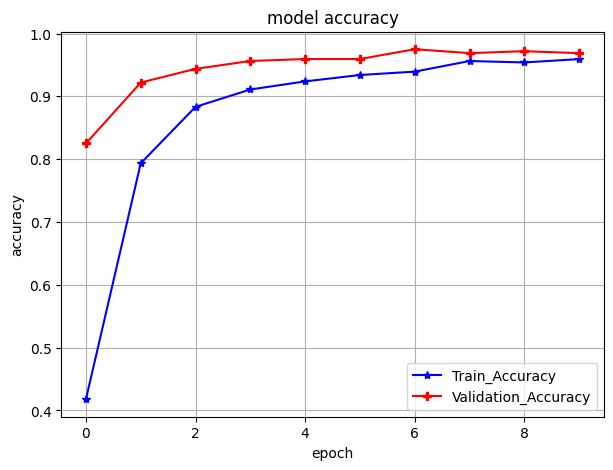

In [41]:
plt.figure(figsize=(7,5))
plt.plot(history.history['accuracy'],label="Train_Accuracy",color="blue",marker="*")
plt.plot(history.history['val_accuracy'],label="Validation_Accuracy",color="red",marker="P")
plt.grid(True)
plt.legend()
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

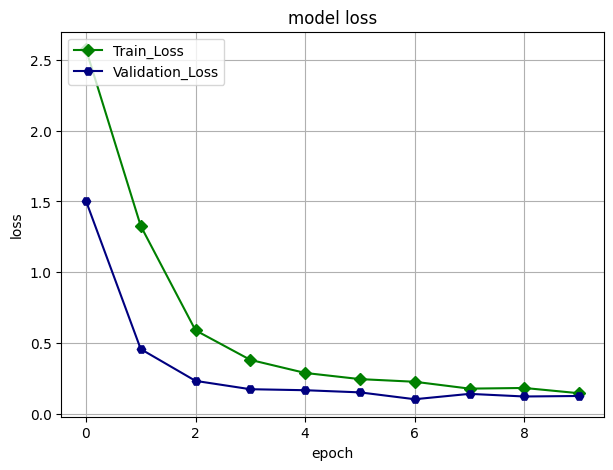

In [42]:
plt.figure(figsize=(7,5))
plt.plot(history.history['loss'],color="green",marker="D")
plt.plot(history.history['val_loss'],color="navy",marker="H")
plt.grid(True)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train_Loss', 'Validation_Loss'], loc='upper left')
plt.show()

11/11 [==============================] - 10s 854ms/step


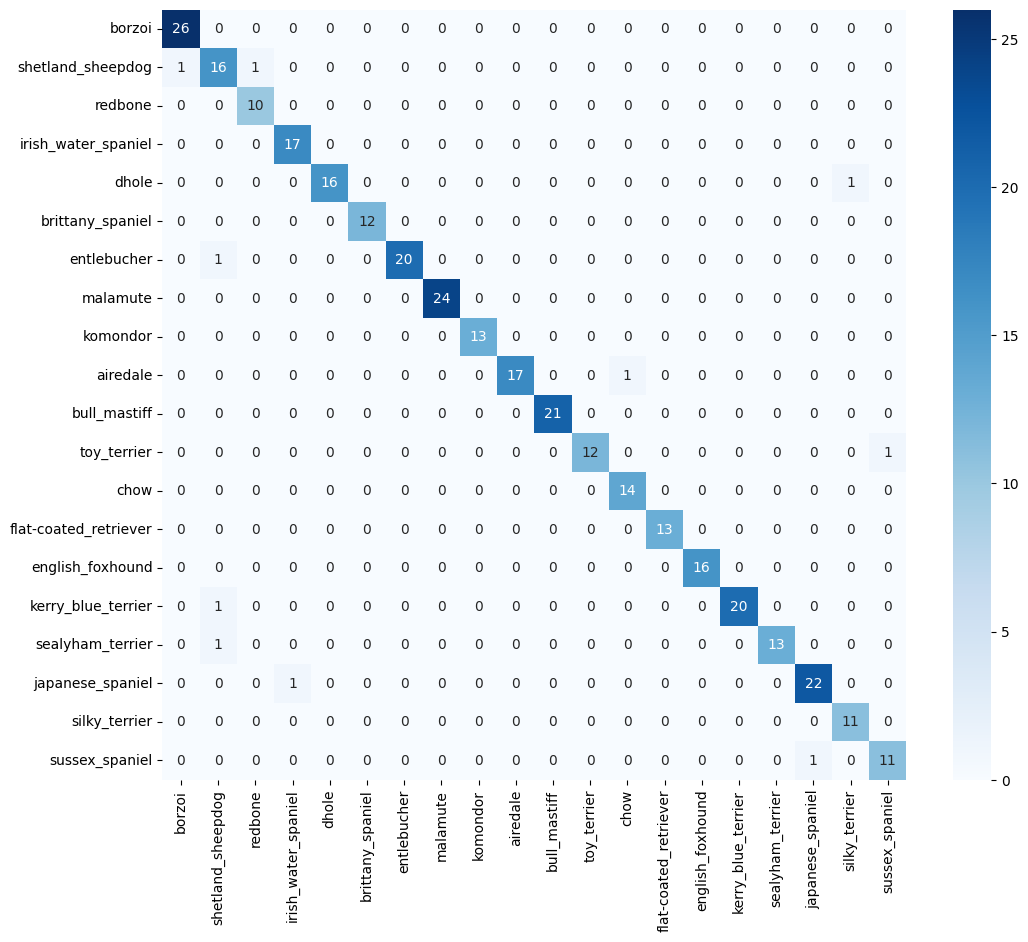

In [43]:
pre=model.predict(x_test)
predict=np.argmax(pre,axis=1)

from sklearn.metrics import confusion_matrix, classification_report
plt.figure(figsize=(12,10))
cf=confusion_matrix(y_test,predict)
sns.heatmap(cf,annot=True,fmt="d",cmap="Blues",xticklabels=lab,yticklabels=lab)
plt.show()


In [44]:
print(classification_report(y_test,predict,target_names=lab))

                       precision    recall  f1-score   support

               borzoi       0.96      1.00      0.98        26
    shetland_sheepdog       0.84      0.89      0.86        18
              redbone       0.91      1.00      0.95        10
  irish_water_spaniel       0.94      1.00      0.97        17
                dhole       1.00      0.94      0.97        17
     brittany_spaniel       1.00      1.00      1.00        12
          entlebucher       1.00      0.95      0.98        21
             malamute       1.00      1.00      1.00        24
             komondor       1.00      1.00      1.00        13
             airedale       1.00      0.94      0.97        18
         bull_mastiff       1.00      1.00      1.00        21
          toy_terrier       1.00      0.92      0.96        13
                 chow       0.93      1.00      0.97        14
flat-coated_retriever       1.00      1.00      1.00        13
     english_foxhound       1.00      1.00      1.00  

8. Visualization

1/1 [==============================] - 0s 90ms/step


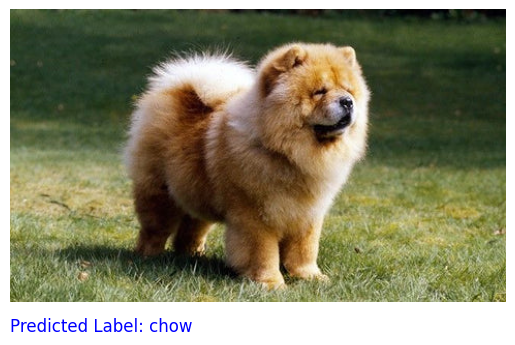

1/1 [==============================] - 0s 83ms/step


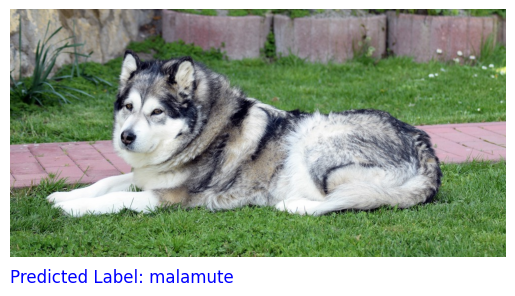

1/1 [==============================] - 0s 91ms/step


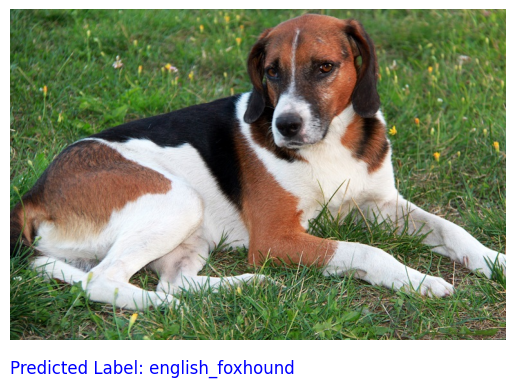

In [45]:
import numpy as np
from PIL import Image
from keras.preprocessing import image
from keras.applications.resnet_v2 import preprocess_input
import matplotlib.pyplot as plt

# 여러 이미지 파일 경로 리스트
image_paths = ["./dog_data/dog_sample_chow.jpg", 
               "./dog_data/dog_sample_malamute.jpg", 
               "./dog_data/dog_sample_english_foxhound.jpg",
               # add jpg
               ]

# 각 이미지에 대한 처리 및 결과 출력
for img_path in image_paths:
    # 이미지 전처리
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # 이미지에 모델 적용 및 예측
    predictions = model.predict(img_array)
    predicted_label = np.argmax(predictions)

    # 예측된 레이블을 실제 클래스 레이블로 변환
    predicted_label_name = encoder.inverse_transform([predicted_label])[0]

    # 이미지 출력
    plt.imshow(Image.open(img_path))
    plt.axis('off')

    # 예측 라벨 텍스트 추가
    plt.text(0, -0.1, f"Predicted Label: {predicted_label_name}", transform=plt.gca().transAxes, fontsize=12, color='blue')

    # 결과 출력
    plt.show()